# Process Raw Sensor Data Collected by Master_Script.py

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from datetime import datetime
import csv

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

import pdb

In [2]:
def reward_occupancy(observation_sequence, reward_type = 'IR_distance'):
        """
        Calculate reward based on occupancy i.e. the IRs data
        
        Args:
            observation_sequence (pd.DataFrame): observation
                1st column      : observation['timestamp']
                2nd-25th columns: 24 IRs
        Kwargs:
            reward_type (string): reward type
                1. 'IR_distance': based on IR distance from detected object to IR
                2. 'IR_state_ratio': the ratio of # of detected objects and all # 
                                     of IR sensors 
                3. 'IR_state_number': the number of detected objects
        
        Returns:
            observation_sequence (pd.DataFrame): add reward of each observation as a column 'reward_IR_distance'
                last column: observation_sequence['reward_IR_distance']
        """
        # Make here insistent with IR data
        #   1. 'IR_distance': based on IR distance from detected object to IR
        #   2. 'IR_state_ratio': the ratio of # of detected objects and all # 
        #                        of IR sensors 
        #   3. 'IR_state_number': the number of detected objects
        
        if reward_type == 'IR_distance':
            observation_sequence['reward_IR_distance'] = observation_sequence.iloc[:, 1:1+24].sum(axis=1)
        elif reward_type == 'IR_state_ratio':
            # TODO:
            pass
        elif reward_type == 'IR_state_number':
            # TODO:
            pass
        else:
            raise Exception('Please choose a proper reward type!')
        
        return observation_sequence

#### Load Raw Sensor Data Collected by Master_Script.py
1. load sensro data
2. Get start time
3. Convert relative time to timestamp
4. Convert timestamp to readable datatime
5. Drop last column which contain NON
6. Filter out data outside [1pm, 4pm]
7. Calculate reward

In [6]:
import glob
raw_sensor_data_files = glob.glob('raw_sensor_data_from_master_script/*.csv')
raw_sensor_data_files.sort()
raw_sensor_data = {}
for file in raw_sensor_data_files:
    print('Loading: {}'.format(file))
    # 1. load sensro data
    raw_sensor_data[file] = pd.read_csv(file, skiprows=4)
    
    # 2. Get start time
    with open(file, newline='') as f:
        reader = csv.reader(f)
        for i in range(4):
            tmp = next(reader)
            #print(tmp)
            if i == 2:
                line_with_time = tmp
    _, start_time = line_with_time[0].split(':')
    datetime_format = '%Y-%m-%d %H:%M:%S'
    start_time = float(start_time)
    start_time_datetime_format = datetime.fromtimestamp(start_time).strftime(datetime_format)
    #print('start_time_datetime_format = {}'.format(start_time_datetime_format))
    
    # 3. Convert relative time to timestamp
    raw_sensor_data[file]['timestamp'] = start_time + raw_sensor_data[file]['timestamp']
    
    # 4. Convert timestamp to readable datatime
    raw_sensor_data[file]['timestamp'] = raw_sensor_data[file]['timestamp'].apply(pd.Timestamp.fromtimestamp)
    
    
    # 5. drop last column which contain NON
    raw_sensor_data[file] = raw_sensor_data[file].drop([raw_sensor_data[file].columns[-1]], axis=1)
    
    # 6. filter out data outside [1pm, 4pm]
    date, time = start_time_datetime_format.split(' ')
    raw_sensor_data[file] = raw_sensor_data[file].loc[(raw_sensor_data[file]['timestamp'] >= date+' '+'13:00:00') & (raw_sensor_data[file]['timestamp'] <= date+' '+'16:00:00')]
    #raw_sensor_data[file] = raw_sensor_data[file].loc[(raw_sensor_data[file]['timestamp'] <= date+' '+'16:00:00')]
    # 7. clculate reward
    raw_sensor_data[file] = reward_occupancy(raw_sensor_data[file], reward_type = 'IR_distance')
    
    # reset index to start from 0
    raw_sensor_data[file] = raw_sensor_data[file].reset_index()
    raw_sensor_data[file] = raw_sensor_data[file].drop([raw_sensor_data[file].columns[0]], axis=1)
    #print('Loading: done')
    
#     # plot all IR data to spot blocked IR
#     date = file.split('__')[1].split('_2018')[0]
#     raw_sensor_data[file].plot(x="timestamp", 
#                                y=['IR1-1', 'IR1-2', 'IR2-1', 'IR2-2', 'IR3-1', 'IR3-2', 'IR4-1', 'IR4-2', 
#                                   'IR5-1', 'IR5-2', 'IR6-1', 'IR6-2', 'IR7-1', 'IR7-2', 'IR8-1', 'IR8-2', 
#                                   'IR9-1', 'IR9-2', 'IR10-1', 'IR10-2', 'IR11-1', 'IR11-2', 'IR12-1', 'IR12-2'], 
#                                title='Data on {}'.format(date))
#     print('Mean of each IR on {}'.format(date))
#     print(raw_sensor_data[file].mean())

    

Loading: raw_sensor_data_from_master_script/01_sensor_data__September_14_2018_at_09-00-00.csv
Loading: raw_sensor_data_from_master_script/02_sensor_data__September_17_2018_at_10-20-36.csv
Loading: raw_sensor_data_from_master_script/03_sensor_data__September_18_2018_at_11-33-32.csv
Loading: raw_sensor_data_from_master_script/04_sensor_data__September_19_2018_at_09-33-44.csv
Loading: raw_sensor_data_from_master_script/05_sensor_data__September_20_2018_at_12-58-58.csv
Loading: raw_sensor_data_from_master_script/06_sensor_data__September_21_2018_at_12-59-00.csv
Loading: raw_sensor_data_from_master_script/07_sensor_data__September_24_2018_at_11-45-01.csv
Loading: raw_sensor_data_from_master_script/08_sensor_data__September_25_2018_at_11-17-27.csv
Loading: raw_sensor_data_from_master_script/09_sensor_data__September_26_2018_at_09-43-46.csv
Loading: raw_sensor_data_from_master_script/10_sensor_data__September_27_2018_at_09-00-00.csv
Loading: raw_sensor_data_from_master_script/11_sensor_data__

In [7]:
list(raw_sensor_data.keys())

['raw_sensor_data_from_master_script/01_sensor_data__September_14_2018_at_09-00-00.csv',
 'raw_sensor_data_from_master_script/02_sensor_data__September_17_2018_at_10-20-36.csv',
 'raw_sensor_data_from_master_script/03_sensor_data__September_18_2018_at_11-33-32.csv',
 'raw_sensor_data_from_master_script/04_sensor_data__September_19_2018_at_09-33-44.csv',
 'raw_sensor_data_from_master_script/05_sensor_data__September_20_2018_at_12-58-58.csv',
 'raw_sensor_data_from_master_script/06_sensor_data__September_21_2018_at_12-59-00.csv',
 'raw_sensor_data_from_master_script/07_sensor_data__September_24_2018_at_11-45-01.csv',
 'raw_sensor_data_from_master_script/08_sensor_data__September_25_2018_at_11-17-27.csv',
 'raw_sensor_data_from_master_script/09_sensor_data__September_26_2018_at_09-43-46.csv',
 'raw_sensor_data_from_master_script/10_sensor_data__September_27_2018_at_09-00-00.csv',
 'raw_sensor_data_from_master_script/11_sensor_data__September_28_2018_at_12-38-25.csv',
 'raw_sensor_data_fro

In [8]:
dirty_data_sep_19 = raw_sensor_data['raw_sensor_data_from_master_script/04_sensor_data__September_19_2018_at_09-33-44.csv']

# Clean Data

In [13]:
import glob
raw_sensor_data_files = glob.glob('raw_sensor_data_from_master_script_clean/*.csv')
raw_sensor_data_files.sort()
raw_sensor_data = {}
for file in raw_sensor_data_files:
    print('Loading: {}'.format(file))
    # 1. load sensro data
    raw_sensor_data[file] = pd.read_csv(file)
    
#     # plot all IR data to spot blocked IR
#     date = file.split('__')[1].split('_2018')[0]
#     raw_sensor_data[file].plot(x="timestamp", 
#                                y=['IR1-1', 'IR1-2', 'IR2-1', 'IR2-2', 'IR3-1', 'IR3-2', 'IR4-1', 'IR4-2', 
#                                   'IR5-1', 'IR5-2', 'IR6-1', 'IR6-2', 'IR7-1', 'IR7-2', 'IR8-1', 'IR8-2', 
#                                   'IR9-1', 'IR9-2', 'IR10-1', 'IR10-2', 'IR11-1', 'IR11-2', 'IR12-1', 'IR12-2'], 
#                                title='Data on {}'.format(date))
#     print('Mean of each IR on {}'.format(date))
#     print(raw_sensor_data[file].mean())
    

Loading: raw_sensor_data_from_master_script_clean/01_sensor_data__September_14_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/02_sensor_data__September_17_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/03_sensor_data__September_18_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/04_sensor_data__September_19_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/05_sensor_data__September_20_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/06_sensor_data__September_21_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/07_sensor_data__September_24_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/08_sensor_data__September_25_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/09_sensor_data__September_26_2018_1pm_4pm_clean.csv
Loading: raw_sensor_data_from_master_script_clean/10_sensor_data__September_27_201

In [14]:
raw_sensor_data_files

['raw_sensor_data_from_master_script_clean/01_sensor_data__September_14_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/02_sensor_data__September_17_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/03_sensor_data__September_18_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/04_sensor_data__September_19_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/05_sensor_data__September_20_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/06_sensor_data__September_21_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/07_sensor_data__September_24_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/08_sensor_data__September_25_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/09_sensor_data__September_26_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_script_clean/10_sensor_data__September_27_2018_1pm_4pm_clean.csv',
 'raw_sensor_data_from_master_

In [15]:
clean_data_sep_19 = pd.read_csv('raw_sensor_data_from_master_script_clean/04_sensor_data__September_19_2018_1pm_4pm_clean.csv')

# Compare

In [24]:
dirty_data_sep_19.shape


(78266, 26)

In [23]:
clean_data_sep_19.shape

(78266, 26)

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


<IPython.core.display.Javascript object>


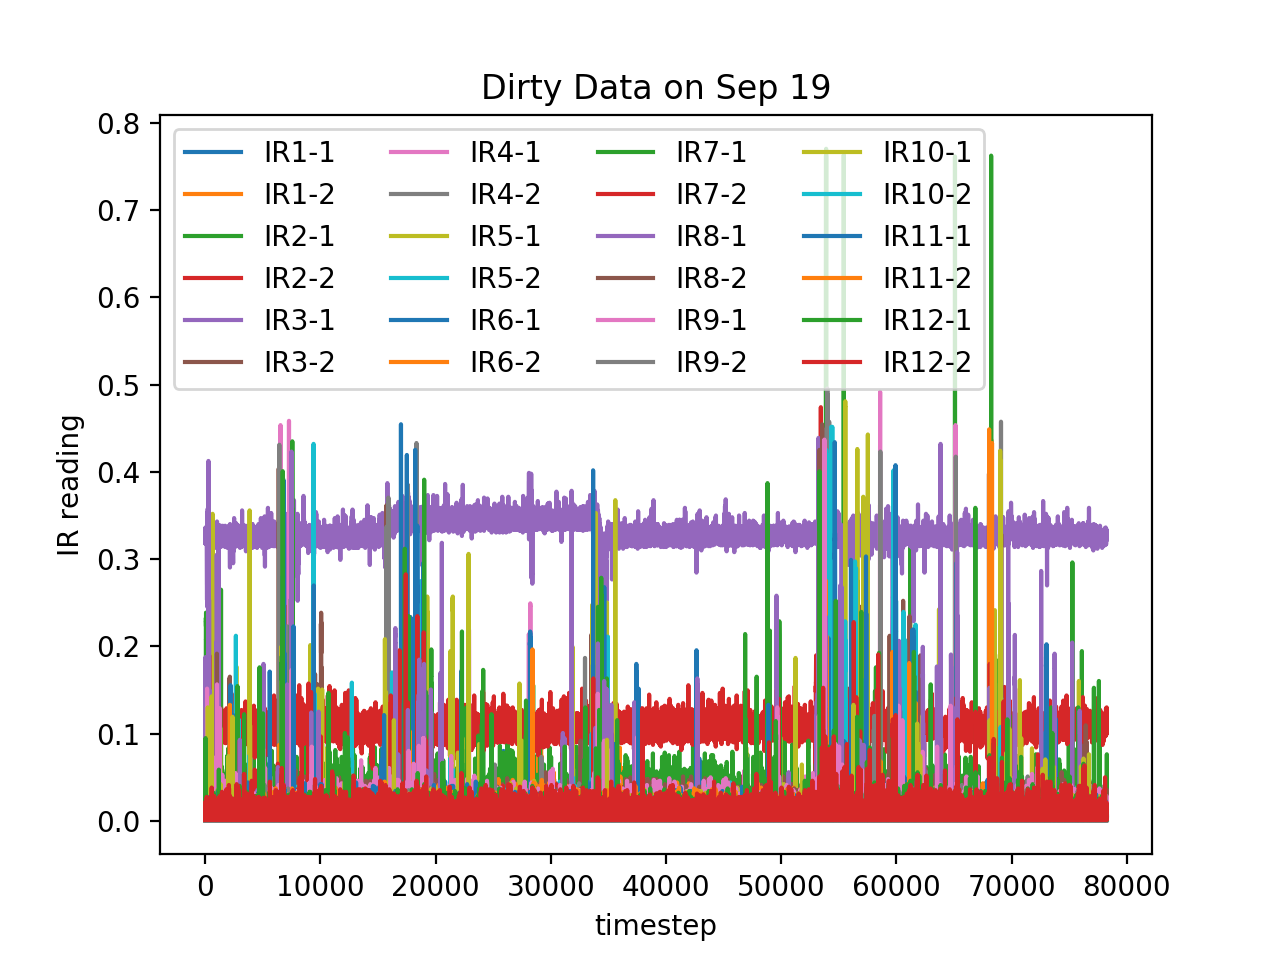

In [44]:
dirty_data_sep_19.plot(x=np.arange(dirty_data_sep_19.shape[0]), 
                       y=['IR1-1', 'IR1-2', 'IR2-1', 'IR2-2', 'IR3-1', 'IR3-2', 'IR4-1', 'IR4-2', 
                          'IR5-1', 'IR5-2', 'IR6-1', 'IR6-2', 'IR7-1', 'IR7-2', 'IR8-1', 'IR8-2', 
                          'IR9-1', 'IR9-2', 'IR10-1', 'IR10-2', 'IR11-1', 'IR11-2', 'IR12-1', 'IR12-2'], 
                       title='Dirty Data on Sep 19')
plt.ylabel('IR reading')
plt.xlabel('timestep')
plt.legend(ncol=4)

plt.savefig('./figures/dirty_data_on_Sep_19.png', dpi=300)

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


<IPython.core.display.Javascript object>


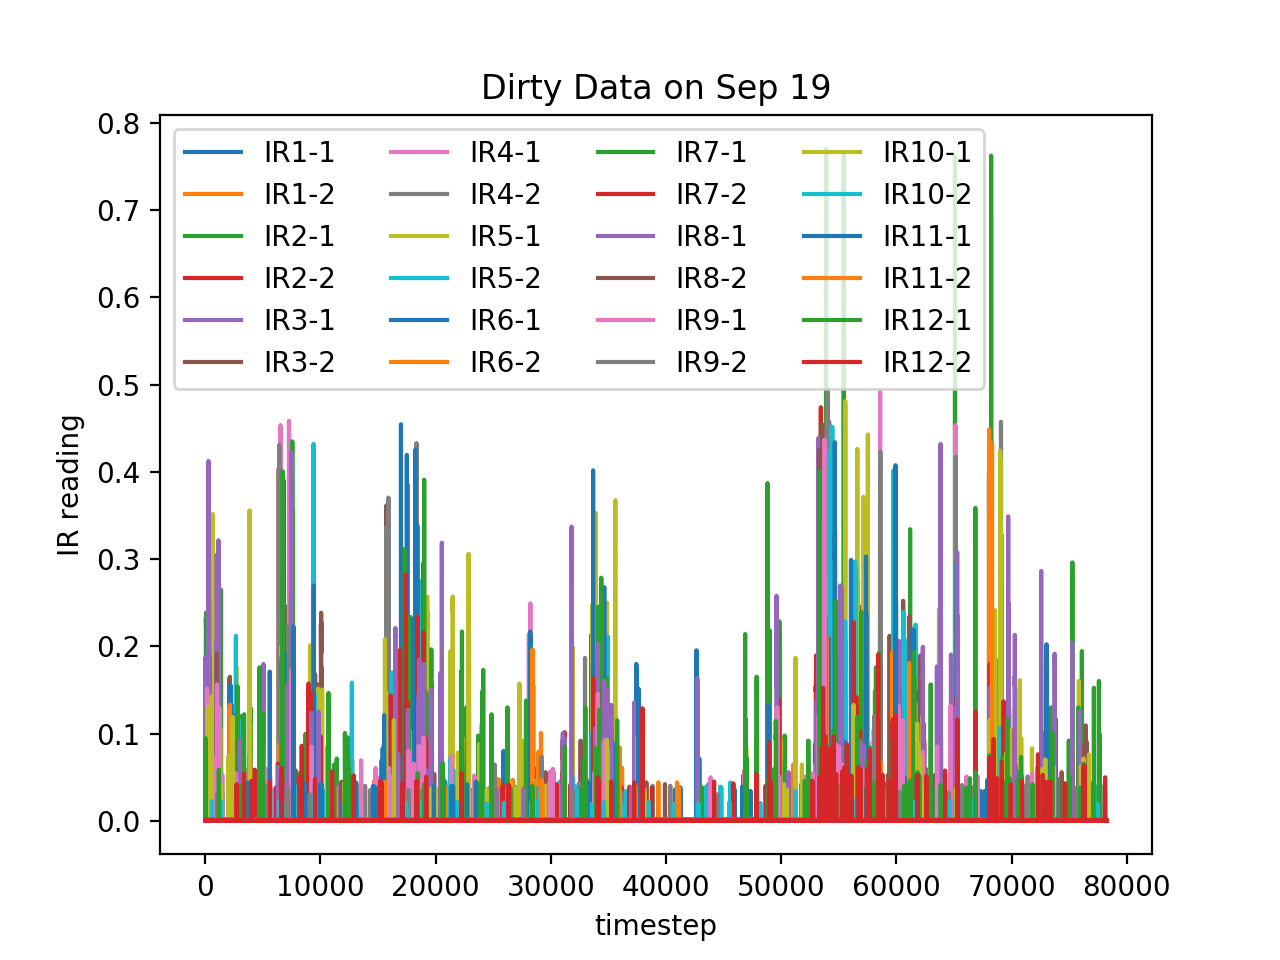

In [45]:
clean_data_sep_19.plot(x=np.arange(clean_data_sep_19.shape[0]), 
                       y=['IR1-1', 'IR1-2', 'IR2-1', 'IR2-2', 'IR3-1', 'IR3-2', 'IR4-1', 'IR4-2',
                          'IR5-1', 'IR5-2', 'IR6-1', 'IR6-2', 'IR7-1', 'IR7-2', 'IR8-1', 'IR8-2', 
                          'IR9-1', 'IR9-2', 'IR10-1', 'IR10-2', 'IR11-1', 'IR11-2', 'IR12-1', 'IR12-2'], 
                       title='Dirty Data on Sep 19')
plt.ylabel('IR reading')
plt.xlabel('timestep')
plt.legend(ncol=4)

plt.savefig('./figures/clean_data_on_Sep_19.png', dpi=300)